In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

def toDate(str):
    return datetime.strptime(str, '%Y-%m-%d %H:%M:%S %z %Z')

def jsonStr(s):
    return round(s['temp'],2)
 


In [139]:
paphos=pd.read_json('file:///Users/walkerrowe/Documents/paphosWeather.json')


In [140]:
paphos['dt_iso']=pd.DataFrame(paphos['dt_iso'].apply(toDate)) 
paphos['temp']=pd.DataFrame(paphos['main'].apply(jsonStr))
paphos['month']=pd.DataFrame(paphos['dt_iso'].apply(lambda x: x.month))


paphos.set_index('dt_iso',inplace=True)

In [141]:
paphos.columns

Index(['city_name', 'clouds', 'dt', 'lat', 'lon', 'main', 'rain', 'timezone',
       'weather', 'wind', 'temp', 'month'],
      dtype='object')

In [142]:
temps=paphos[['temp','month']]

In [143]:
thisSummer=temps.loc['2020-05-01':'2020-09-13']
lastSummer=temps.loc['2019-05-01':'2019-09-13']

In [151]:
year2019=thisSummer.mean()
year2020=lastSummer.mean() 

In [144]:
Summer2019=thisSummer.groupby('month').mean()
Summer2020=lastSummer.groupby('month').mean() 

In [150]:
 
Summer2019.join(Summer2020, lsuffix='_2019', rsuffix='_2020').round(2)

,temp_2019,temp_2020
month,,
5,70.51,70.18
6,72.94,76.74
7,80.01,79.92
8,80.67,81.31
9,81.73,79.28


In [155]:
year2019.round(2)

temp     76.56
month     6.73
dtype: float64

In [156]:
year2020.round(2)

temp     77.26
month     6.74
dtype: float64

In [148]:
 np.ravel(Summer2020)

array([70.17849462, 76.74183333, 79.92373656, 81.31474462, 79.28054487])

<BarContainer object of 5 artists>

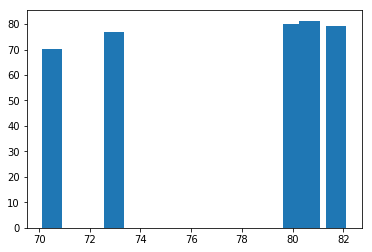

In [149]:
plt.bar(np.ravel(Summer2019), np.ravel(Summer2020))